In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
import re
from sklearn.cluster import DBSCAN
import hdbscan

# Synthetic Data

Two arcs

Each arc is made up of spherical clusters of same size

Size, density and number of clusters can be varied by n_cluster, points_per_cluster and cluster_radius

Size and share of arcs can be varied by arc_radius and arc_angle

C:\Users\Dell\AppData\Local\Temp\ipykernel_11324\2429345349.py:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], s=30, cmap='viridis')


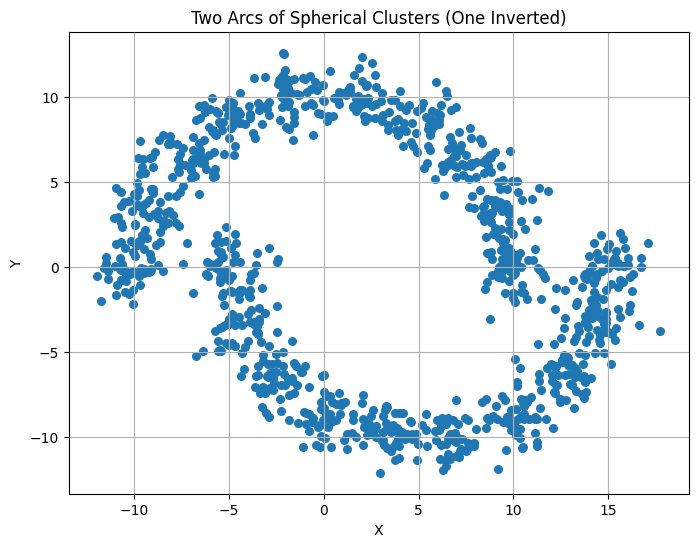

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate points around a given center
def generate_cluster(center, radius, n_points):
    return center + radius * np.random.randn(n_points, 2)

# Generate multiple spherical clusters arranged in arcs
def generate_arc_clusters(n_clusters, points_per_cluster, arc_radius, cluster_radius, arc_angle, invert=False, arc_shift=(0,0)):
    clusters = []
    for i in range(n_clusters):
        # Angle for each cluster's center
        theta = i * (arc_angle / (n_clusters - 1))
        # Position of cluster center on the arc
        x_center = arc_radius * np.cos(theta)
        y_center = arc_radius * np.sin(theta)
        if invert:
            y_center = -y_center  # Invert the arc vertically
        center = np.array([x_center, y_center]) + np.array(arc_shift)  # Shift arc to new position
        # Generate points around the center
        cluster = generate_cluster(center, cluster_radius, points_per_cluster)
        clusters.append(cluster)
    return np.vstack(clusters)

# Parameters for the data generation
n_clusters = 10  # Number of spherical clusters in each arc
points_per_cluster = 50  # Number of points in each cluster
arc_radius = 10  # Radius of the arc on which the cluster centers lie
cluster_radius = 1  # Radius of each spherical cluster
arc_angle = np.pi  # Angle of the arc (in radians) - here half-circle

# Generate two arcs: one normal and one inverted
arc1 = generate_arc_clusters(n_clusters, points_per_cluster, arc_radius, cluster_radius, arc_angle, invert=False, arc_shift=(0, 0))
arc2 = generate_arc_clusters(n_clusters, points_per_cluster, arc_radius, cluster_radius, arc_angle, invert=True, arc_shift=(5, 0))

# Combine the two arcs
data = np.vstack([arc1, arc2])

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], s=30, cmap='viridis')
plt.title("Two Arcs of Spherical Clusters (One Inverted)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


# K Means Clustering 

Works well even with this data if number of clusters are reasonably estimated

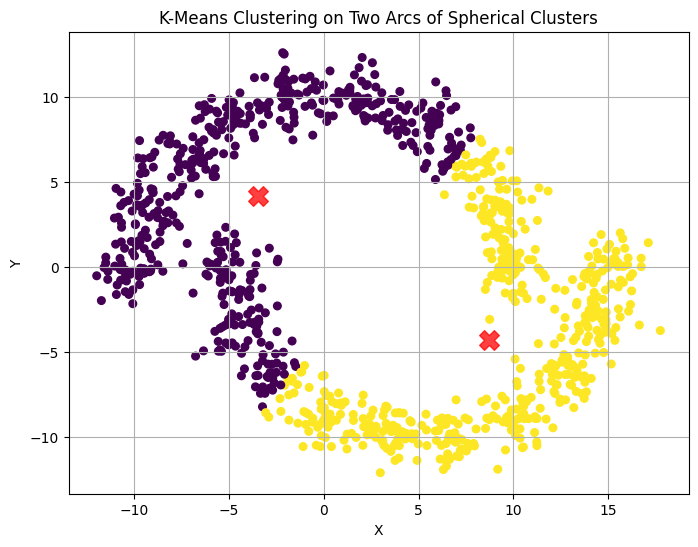

In [3]:
from sklearn.cluster import KMeans

# Applying K-means clustering with an estimated number of clusters
n_clusters = 2  # You can adjust the number of clusters
kmeans_clusterer = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans_clusterer.fit_predict(data)

# Plot the data and K-means clustering result
plt.figure(figsize=(8, 6))

# Plot the original data points with K-means clustering labels
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=30, cmap='viridis', label='Data Points')

# Plot the centroids
centroids = kmeans_clusterer.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title("K-Means Clustering on Two Arcs of Spherical Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


# DB Scan 

Works well if eps and min_samples are reasonable. 

Easier to estimate than K means

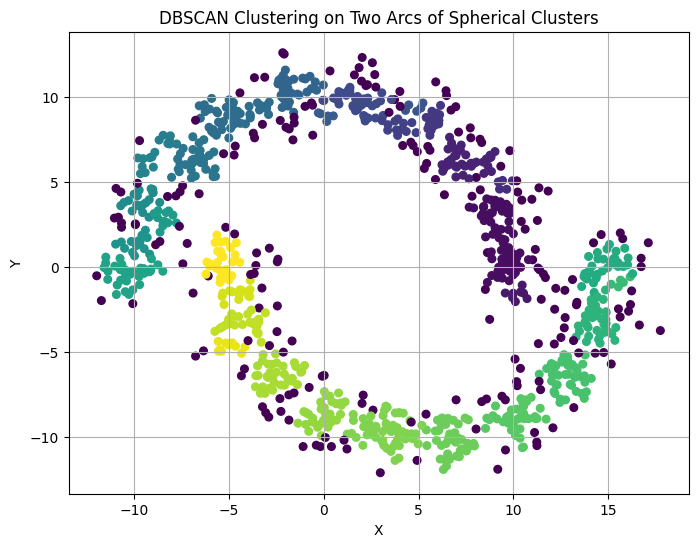

In [4]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN clustering
dbscan_clusterer = DBSCAN(eps=0.6, min_samples=5)
y_dbscan = dbscan_clusterer.fit_predict(data)

# Plot the data and DBSCAN clustering result
plt.figure(figsize=(8, 6))

# Plot the original data points with DBSCAN clustering labels
plt.scatter(data[:, 0], data[:, 1], c=y_dbscan, s=30, label='Data Points')

plt.title("DBSCAN Clustering on Two Arcs of Spherical Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In [5]:
for eps in range(5,11, 1):    
    dbscan_clusterer = DBSCAN(eps=eps/10, min_samples=5)
    y_dbscan = dbscan_clusterer.fit_predict(data)
    print(eps/10, len(set(y_dbscan)))

0.5 36
0.6 32
0.7 17
0.8 6
0.9 4
1.0 3


# Arc Data with different densities

C:\Users\Dell\AppData\Local\Temp\ipykernel_11324\559315939.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  points_per_cluster_random = int(np.random.uniform(points_per_cluster - 35,
C:\Users\Dell\AppData\Local\Temp\ipykernel_11324\559315939.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], s=30, cmap='viridis')


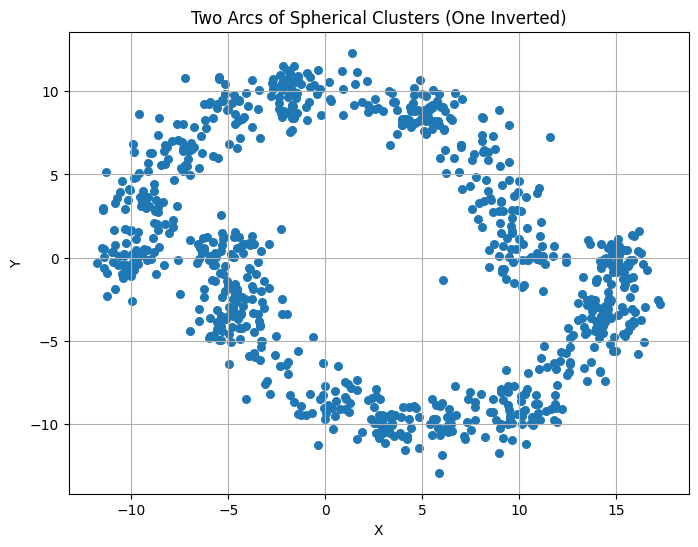

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate points around a given center
def generate_cluster(center, radius, n_points):
    return center + radius * np.random.randn(n_points, 2)

# Generate multiple spherical clusters arranged in arcs
def generate_arc_clusters(n_clusters, points_per_cluster, arc_radius, cluster_radius, arc_angle, invert=False, arc_shift=(0,0)):
    clusters = []
    for i in range(n_clusters):
        points_per_cluster_random = int(np.random.uniform(points_per_cluster - 35, 
                                                      points_per_cluster+25, 1))
        
        # Angle for each cluster's center
        theta = i * (arc_angle / (n_clusters - 1))
        # Position of cluster center on the arc
        x_center = arc_radius * np.cos(theta)
        y_center = arc_radius * np.sin(theta)
        if invert:
            y_center = -y_center  # Invert the arc vertically
        center = np.array([x_center, y_center]) + np.array(arc_shift)  # Shift arc to new position
        # Generate points around the center
        cluster = generate_cluster(center, cluster_radius, points_per_cluster_random)
        clusters.append(cluster)
    return np.vstack(clusters)

# Parameters for the data generation
n_clusters = 10  # Number of spherical clusters in each arc
points_per_cluster = 50  # Number of points in each cluster
arc_radius = 10  # Radius of the arc on which the cluster centers lie
cluster_radius = 1  # Radius of each spherical cluster
arc_angle = np.pi  # Angle of the arc (in radians) - here half-circle

# Generate two arcs: one normal and one inverted
arc1 = generate_arc_clusters(n_clusters, points_per_cluster, arc_radius, cluster_radius, arc_angle, invert=False, arc_shift=(0, 0))
arc2 = generate_arc_clusters(n_clusters, points_per_cluster, arc_radius, cluster_radius, arc_angle, invert=True, arc_shift=(5, 0))

# Combine the two arcs
data = np.vstack([arc1, arc2])

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], s=30, cmap='viridis')
plt.title("Two Arcs of Spherical Clusters (One Inverted)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


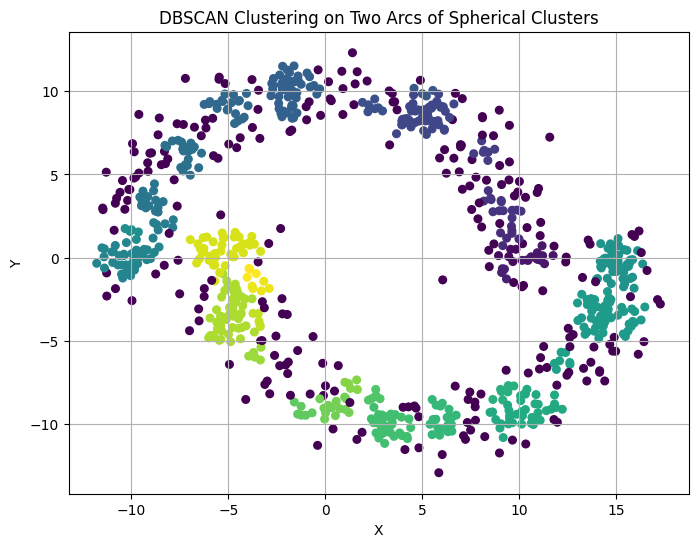

In [8]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN clustering
dbscan_clusterer = DBSCAN(eps=0.6, min_samples=5)
y_dbscan = dbscan_clusterer.fit_predict(data)

# Plot the data and DBSCAN clustering result
plt.figure(figsize=(8, 6))

# Plot the original data points with DBSCAN clustering labels
plt.scatter(data[:, 0], data[:, 1], c=y_dbscan, s=30, label='Data Points')

plt.title("DBSCAN Clustering on Two Arcs of Spherical Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In [9]:
for eps in range(5,11, 1):    
    dbscan_clusterer = DBSCAN(eps=eps/10, min_samples=5)
    y_dbscan = dbscan_clusterer.fit_predict(data)
    print(eps/10, len(set(y_dbscan)))

0.5 29
0.6 34
0.7 23
0.8 14
0.9 8
1.0 7


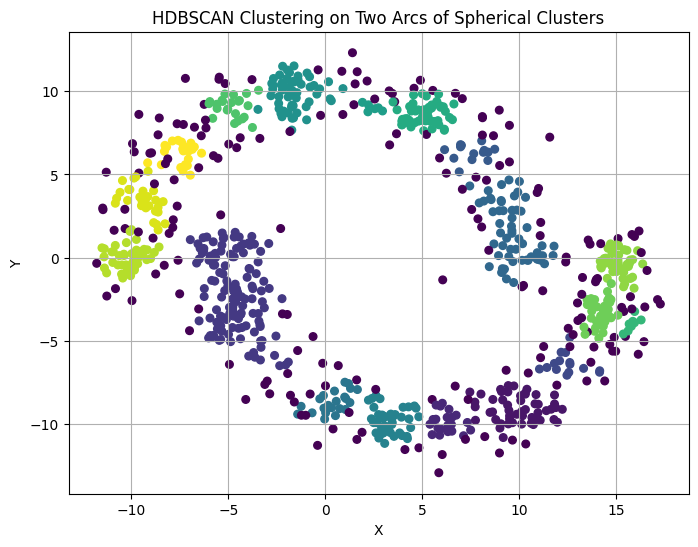

In [10]:
import hdbscan
import matplotlib.pyplot as plt

# Applying HDBSCAN clustering
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
y_hdbscan = hdbscan_clusterer.fit_predict(data)

# Plot the data and HDBSCAN clustering result
plt.figure(figsize=(8, 6))

# Plot the original data points with HDBSCAN clustering labels
plt.scatter(data[:, 0], data[:, 1], c=y_hdbscan, s=30, label='Data Points')

plt.title("HDBSCAN Clustering on Two Arcs of Spherical Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In [11]:
len(set(y_hdbscan))

19

# Experiment with BDNews 24

In [12]:
df = pd.read_csv('bdnews.csv')
# Display the DataFrame
print(df.head())


   Unnamed: 0                    DOCNO  \
0           0  en.15.139.461.2009.8.11   
1           1  en.15.139.169.2009.8.11   
2           2  en.15.139.408.2009.8.10   
3           3  en.15.139.442.2009.8.12   
4           4  en.15.139.434.2009.8.11   

                                               TITLE  \
0   EU to tighten sanctions after Suu Kyi conviction   
1      American in Suu Kyi case back in Myanmar jail   
2  HC asks Coco, lawyers to explain forgery alleg...   
3                 Jennifer Hudson gives birth to boy   
4    W.House says Obama strategy will win Afghan war   

                                                TEXT  
0  STOCKHOLM, Aug 11 (bdnews24.com/Reuters) - The...  
1  YANGON, Aug 11(bdnews24.com/Reuters) - An Amer...  
2  Dhaka, Aug 10 (bdnews24.com)  The High Court o...  
3  LOS ANGELES, Aug 11(bdnews24.com/Reuters) - Si...  
4  GUADALAJARA, Mexico, Tue Aug 11,(bdnews24.com/...  


In [13]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['TEXT'])


In [14]:
kmeans = KMeans(n_clusters=10, random_state=42)  # Change n_clusters as needed
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=10, random_state=42)

In [15]:
df['cluster'] = kmeans.labels_
print(df)

       Unnamed: 0                    DOCNO  \
0               0  en.15.139.461.2009.8.11   
1               1  en.15.139.169.2009.8.11   
2               2  en.15.139.408.2009.8.10   
3               3  en.15.139.442.2009.8.12   
4               4  en.15.139.434.2009.8.11   
...           ...                      ...   
89281       89281    en.3.390.193.2007.9.6   
89282       89282    en.3.390.101.2007.9.9   
89283       89283    en.3.390.325.2007.9.6   
89284       89284    en.3.390.74.2007.9.11   
89285       89285    en.3.390.358.2007.9.7   

                                                   TITLE  \
0       EU to tighten sanctions after Suu Kyi conviction   
1          American in Suu Kyi case back in Myanmar jail   
2      HC asks Coco, lawyers to explain forgery alleg...   
3                     Jennifer Hudson gives birth to boy   
4        W.House says Obama strategy will win Afghan war   
...                                                  ...   
89281           Federer see

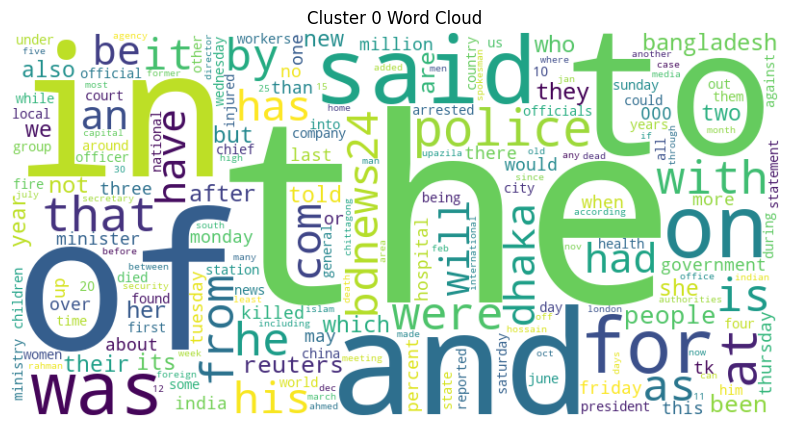

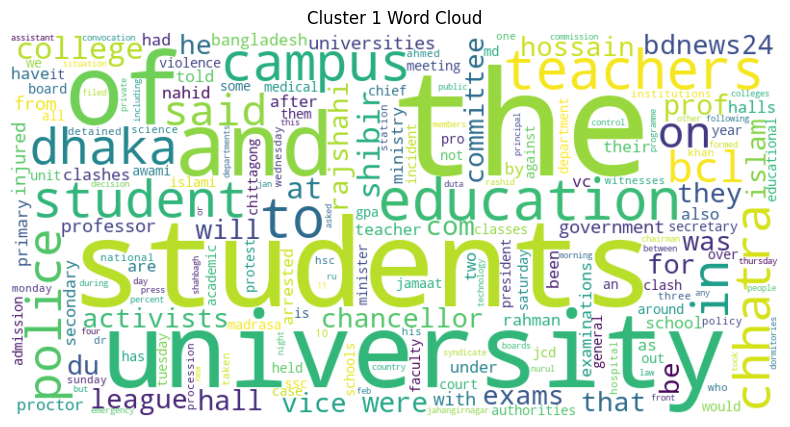

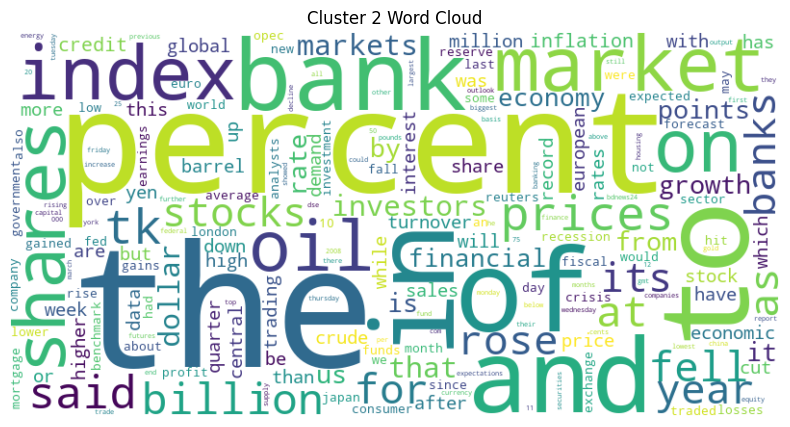

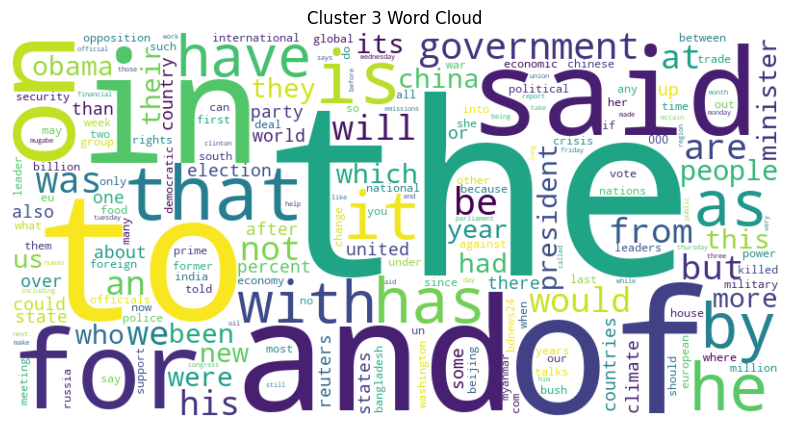

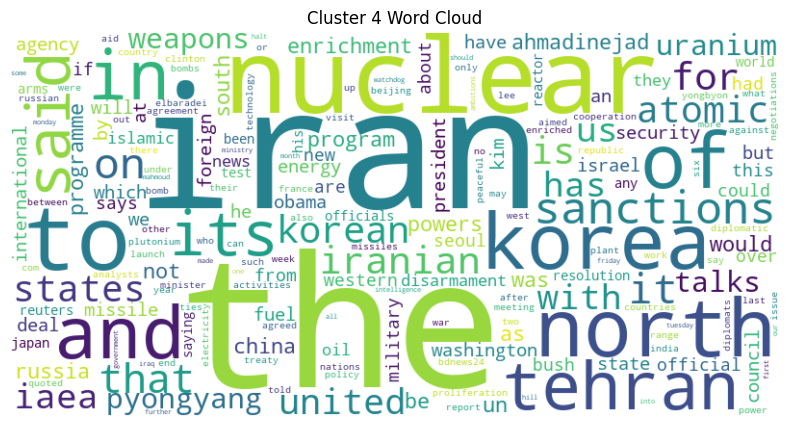

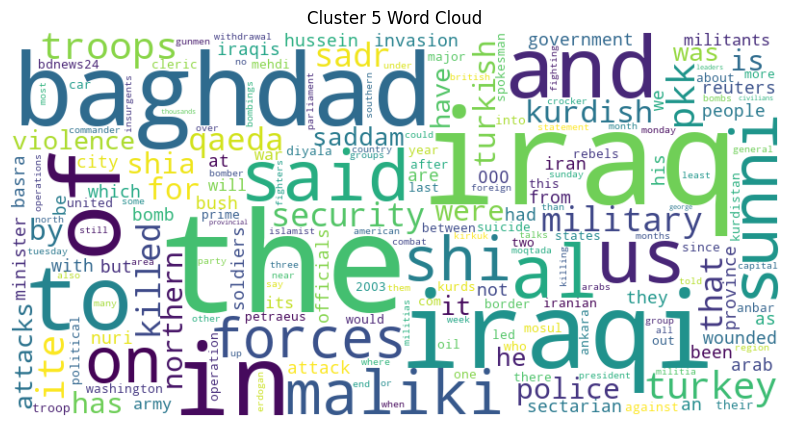

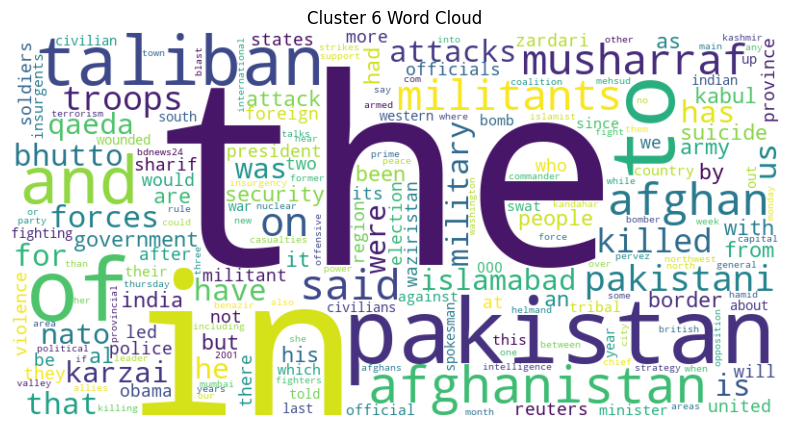

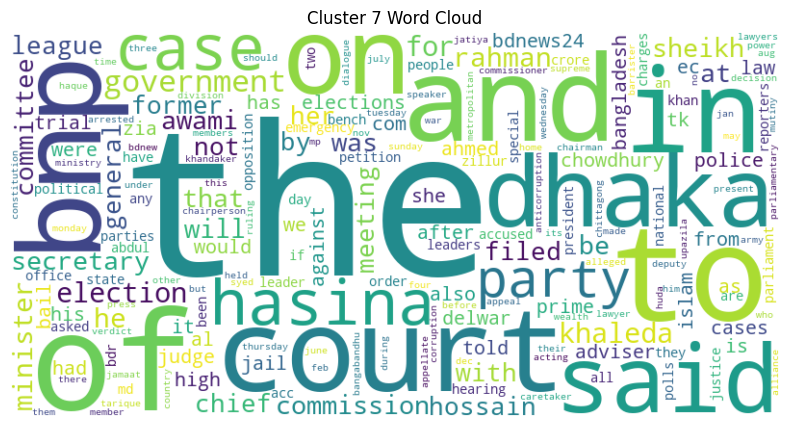

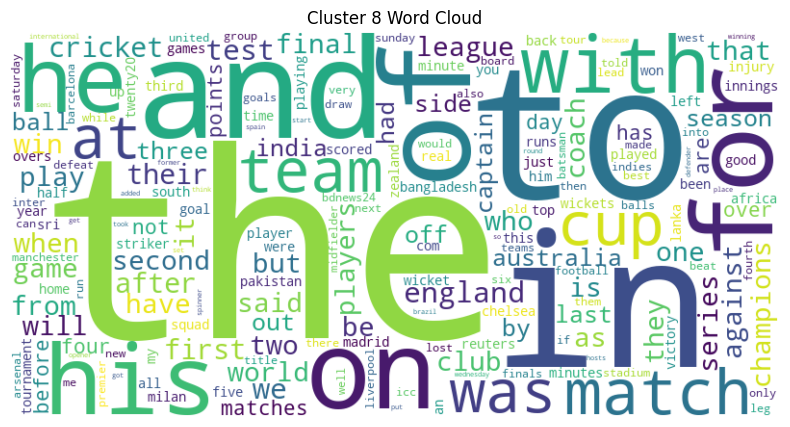

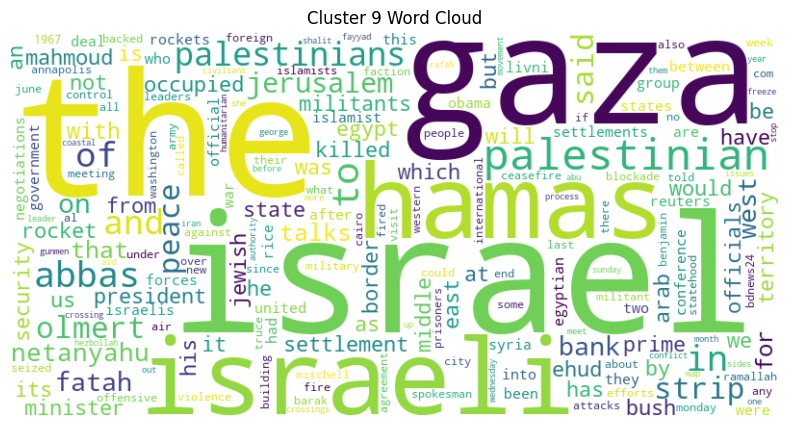

In [16]:
# Get feature names (words) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Function to generate word cloud for a specific cluster
def generate_wordcloud(cluster_number):
    # Select documents in the specific cluster
    cluster_docs = tfidf_matrix[df['cluster'] == cluster_number]
    
    # Sum the TF-IDF scores for each term within the cluster
    word_scores = cluster_docs.sum(axis=0).A1  # Sum along the row for each term
    words_freq = {word: word_scores[idx] for idx, word in enumerate(feature_names)}
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_freq)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster_number} Word Cloud')
    plt.show()

# Generate word clouds for all clusters
for i in range(kmeans.n_clusters):
    generate_wordcloud(i)


# Evaluation

In [17]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Initialize the Snowball Stemmer for English
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize and lemmatize
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

def get_cosine_distance(features):
    cosine_sim_matrix = cosine_similarity(features)
    # Convert cosine similarity to cosine distance
    cosine_dist_matrix = 1 - cosine_sim_matrix
    return cosine_dist_matrix
    
def get_tfidf_vectors(text_list, n=''):
    if not n:
        tfidf_vectorizer = TfidfVectorizer()
    else:
        tfidf_vectorizer = TfidfVectorizer(max_features=n)
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_list)
    return tfidf_matrix

In [18]:
def purity_score(y_true, y_pred):
    # Determine the unique classes and clusters
    classes = np.unique(y_true)
    clusters = np.unique(y_pred)
    
    # Create a contingency matrix
    contingency_matrix = np.zeros((len(classes), len(clusters)), dtype=np.int64)
    
    # Populate the contingency matrix
    for i, class_label in enumerate(classes):
        for j, cluster_label in enumerate(clusters):
            contingency_matrix[i, j] = np.sum((y_true == class_label) & (y_pred == cluster_label))
    
    # Solve the assignment problem to maximize the matching
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)
    
    print(contingency_matrix)
    # Compute purity
    total_samples = np.sum(contingency_matrix)
    matched_samples = np.sum([contingency_matrix[row_ind[k], col_ind[k]] for k in range(len(row_ind))])
    purity = matched_samples / total_samples
    
    return purity


def eval_clusters(labels, preds):
    print("Purity: ", purity_score(labels, preds))
    print("Adjusted Rand Index: ", adjusted_rand_score(labels, preds))
    print("Normalized Mutual Information: ", normalized_mutual_info_score(labels, preds))


In [19]:
# Define clustering methods

def get_kmeans_clusters(features, k):    
    kmeans = KMeans(n_clusters=k, random_state=42)  # Change n_clusters as needed
    kmeans.fit(features)
    return kmeans.labels_

def get_dbscan_clusters(features_or_metric, eps=0.6, min_samples=5, metric=''):
    if metric == 'precomputed':
        dbscan_clusterer = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    else:
        dbscan_clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    y_dbscan = dbscan_clusterer.fit_predict(features_or_metric)
    return y_dbscan

def get_hdbscan_clusters(features_or_metric, min_cluster_size=5, metric=''):
    if metric == 'precomputed':
        hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size, metric='precomputed')
    else:
        hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size)
    y_hdbscan = hdbscan_clusterer.fit_predict(features_or_metric)
    return y_hdbscan

# Load the data

In [22]:
%ls

 Volume in drive C is Win 11
 Volume Serial Number is 92BB-B709

 Directory of c:\Users\Dell\Desktop\IR Lab\Clustering

08-11-2024  01:45    <DIR>          .
25-10-2024  11:53    <DIR>          ..
25-10-2024  11:53       213,130,209 bdnews.csv
25-10-2024  02:30         4,682,668 Clustering.ipynb
08-11-2024  01:51         4,680,654 Clustering_Eval.ipynb
25-10-2024  12:36        69,771,518 news-category.csv
               4 File(s)    292,265,049 bytes
               2 Dir(s)  124,000,559,104 bytes free


In [32]:
df = pd.read_csv('news-category.csv')
# Display the DataFrame
df1 = df.dropna()

selected_categories = ['CRIME', 'SPORTS', 'FOOD & DRINK', 'TECH', 'SCIENCE', 'BUSINESS']
df1 = df1[df1.category.isin(selected_categories)]

df1['processed_short_description'] = df1['short_description'].apply(preprocess_text)

# Running without preprocessing and feature selection

In [33]:
tfidf_vectors = get_tfidf_vectors(text_list=df1['short_description'])
kmeans_labels = get_kmeans_clusters(tfidf_vectors, k=6)
print(f"Scores without preprocessing and feature selection: \n")
eval_clusters(df1['category'], kmeans_labels)

Scores without preprocessing and feature selection: 

[[1120 1397  366  442  258  790]
 [1145  489  203   40   76  140]
 [1436  859  268  773  510  681]
 [ 545  470  119   78   86  130]
 [1856  894  304  171  149  234]
 [ 667  390  157  180  108  179]]
Purity:  0.25375494071146243
Adjusted Rand Index:  0.010092563136495803
Normalized Mutual Information:  0.03175108639278834


# Feature Selection

In [34]:
# Effect of feature selection on cluster quality for Kmeans

for n in range(100,1000,100):
    tfidf_vectors = get_tfidf_vectors(df1['short_description'], n=n)
    kmeans_labels = get_kmeans_clusters(tfidf_vectors, k=6)
    print(f"Scores for {n} features: \n")
    eval_clusters(df1['category'], kmeans_labels)

Scores for 100 features: 

[[ 195 1406   92  511 1814  355]
 [ 362  536  227   53  771  144]
 [ 134  849   44  947 2268  285]
 [  71  482   30   94  634  117]
 [ 238  945  316  197 1659  253]
 [  66  413   38  204  807  153]]
Purity:  0.26386222473178994
Adjusted Rand Index:  0.015746016573537372
Normalized Mutual Information:  0.03444779653745367
Scores for 200 features: 

[[ 194  924  988  586  495 1186]
 [ 442  397  254  201   56  743]
 [ 122  539  876  527  965 1498]
 [  73  344  239  193   94  485]
 [ 278  781  326  371  199 1653]
 [  74  268  269  215  191  664]]
Purity:  0.26013551665725576
Adjusted Rand Index:  0.016261487990189075
Normalized Mutual Information:  0.03373174153164824
Scores for 300 features: 

[[ 949  475  122  577 1187 1063]
 [ 462   54  363  197  253  764]
 [ 580  930   54  516 1105 1342]
 [ 361   91   41  192  264  479]
 [ 781  191  437  351  360 1488]
 [ 288  192   43  212  301  645]]
Purity:  0.25640880858272164
Adjusted Rand Index:  0.018062430092363344
No

In [35]:
# Effect of feature selection on cluster quality for DBScan

for n in range(1000,5000,1000):
    tfidf_vectors = get_tfidf_vectors(df1['short_description'], n=n)
    dbscan_labels = get_dbscan_clusters(tfidf_vectors)
    print(f"Scores for {n} features: \n")
    eval_clusters(df1['category'], dbscan_labels)

Scores for 1000 features: 

[[4346    0   13    1    1    1    0    0    1    1    0    0    1    1
     0    3    0    0    3    0    1    0    0    0    0    0    0    0
     0]
 [2070    1   10    3    0    1    0    0    1    0    3    0    2    1
     0    0    0    1    0    0    0    0    0    0    0    0    0    0
     0]
 [4491    1   10    1    1    0    3    1    1    0    0    2    0    1
     0    2    4    1    1    0    0    3    1    3    0    0    0    0
     0]
 [1398    0   16    1    0    0    2    1    0    0    0    0    0    0
     1    0    0    1    0    0    1    0    0    0    7    0    0    0
     0]
 [3438    7   89    9    8    3    4    2    2    5    3    7    3    3
     4    1    2    1    3    5    3    2    3    1    0    0    0    0
     0]
 [1570    2   26    3    3    0    0    1    1    0    1    1    1    2
     0    4    0    1    3    0    0    1    1    1    0    5   18   26
    10]]
Purity:  0.26081309994353474
Adjusted Rand Index:  0.003685

In [36]:
# Effect of feature selection on cluster quality for HDBScan

for n in range(1000,5000,1000):
    tfidf_vectors = get_tfidf_vectors(df1['short_description'], n=n)
    hdbscan_labels = get_dbscan_clusters(tfidf_vectors)
    print(f"Scores for {n} features: \n")
    eval_clusters(df1['category'], hdbscan_labels)

Scores for 1000 features: 

[[4346    0   13    1    1    1    0    0    1    1    0    0    1    1
     0    3    0    0    3    0    1    0    0    0    0    0    0    0
     0]
 [2070    1   10    3    0    1    0    0    1    0    3    0    2    1
     0    0    0    1    0    0    0    0    0    0    0    0    0    0
     0]
 [4491    1   10    1    1    0    3    1    1    0    0    2    0    1
     0    2    4    1    1    0    0    3    1    3    0    0    0    0
     0]
 [1398    0   16    1    0    0    2    1    0    0    0    0    0    0
     1    0    0    1    0    0    1    0    0    0    7    0    0    0
     0]
 [3438    7   89    9    8    3    4    2    2    5    3    7    3    3
     4    1    2    1    3    5    3    2    3    1    0    0    0    0
     0]
 [1570    2   26    3    3    0    0    1    1    0    1    1    1    2
     0    4    0    1    3    0    0    1    1    1    0    5   18   26
    10]]
Purity:  0.26081309994353474
Adjusted Rand Index:  0.003685

# Using a different similarity metric

In [37]:
# Effect of feature selection on cluster quality for Kmeans

for n in range(100,1000,100):
    tfidf_vectors = get_tfidf_vectors(df1['short_description'], n=n)
    tfidf_vectors_nomralized = normalize(tfidf_vectors, norm='l2')
    kmeans_labels = get_kmeans_clusters(tfidf_vectors_nomralized, k=6)
    print(f"Scores for {n} features: \n")
    eval_clusters(df1['category'], kmeans_labels)

Scores for 100 features: 

[[1330 1099   95  501  998  350]
 [ 780  553  246   58  278  178]
 [1725  628   49  942  907  276]
 [ 548  415   30   93  224  118]
 [1577  911  322  190  331  277]
 [ 687  342   40  197  257  158]]
Purity:  0.24483342744212308
Adjusted Rand Index:  0.012660535164942113
Normalized Mutual Information:  0.03238316805835233
Scores for 200 features: 

[[1101  888  976  566  493  349]
 [ 979  423  252  189   58  192]
 [1416  509  897  503  952  250]
 [ 459  341  238  185   94  111]
 [1693  768  315  348  198  286]
 [ 633  251  253  200  193  151]]
Purity:  0.24731789949181254
Adjusted Rand Index:  0.013014729965447405
Normalized Mutual Information:  0.026990264972435025
Scores for 300 features: 

[[ 988 1159  203  555 1118  350]
 [ 436  466  558  185  267  181]
 [ 592 1950  110  523 1097  255]
 [ 381  414   76  185  260  112]
 [ 790 1335  512  350  343  278]
 [ 277  675   78  203  292  156]]
Purity:  0.26860530773574254
Adjusted Rand Index:  0.026902799440205964
N

In [ ]:
# Effect of feature selection on cluster quality for DBScan

for n in range(1000,5000,1000):
    tfidf_vectors = get_tfidf_vectors(df1['short_description'], n=n)
    metric = abs(get_cosine_distance(tfidf_vectors))
    dbscan_labels = get_dbscan_clusters(features_or_metric=metric, metric='precomputed', eps=0.5, min_samples=2)
    print(f"Scores for {n} features: \n")
    eval_clusters(df1['category'], dbscan_labels)

Scores for 1000 features: 

[[3111 1042    0 ...    0    0    0]
 [1043  949    0 ...    0    0    0]
 [2734 1535    0 ...    2    4    2]
 [ 804  565    1 ...    0    0    0]
 [1524 1895    1 ...    0    0    0]
 [ 913  677    0 ...    0    0    0]]
Purity:  0.28588368153585547
Adjusted Rand Index:  0.02319595401460974
Normalized Mutual Information:  0.06232664037540662
Scores for 2000 features: 

[[3848  262    1 ...    0    0    0]
 [1611  222    2 ...    0    0    0]
 [3524  652    0 ...    2    0    2]
 [1094  202    0 ...    0    2    0]
 [2323  886    4 ...    0    0    0]
 [1217  277    0 ...    0    0    0]]
Purity:  0.2722755505364201
Adjusted Rand Index:  0.017126977625512425
Normalized Mutual Information:  0.09037144622411475
Scores for 3000 features: 

[[4016    0    0 ...    0    0    0]
 [1804    1    0 ...    0    0    0]
 [3815    0    0 ...    2    2    3]
 [1207    0    0 ...    0    0    0]
 [2655    2    3 ...    0    0    0]
 [1325    0    0 ...    0    0    0]]
P

In [ ]:
# Effect of feature selection on cluster quality for HDBScan

for n in range(1000,5000,1000):
    tfidf_vectors = get_tfidf_vectors(df1['short_description'], n=n)
    metric = abs(get_cosine_distance(tfidf_vectors))
    hdbscan_labels = get_hdbscan_clusters(features_or_metric=metric, metric='precomputed')
    print(f"Scores for {n} features: \n")
    eval_clusters(df1['category'], hdbscan_labels)

Scores for 1000 features: 

[[2043    1    0    4    5   11    0    0    3    1    0    0    0    1
     1    1    3    1    3    0    2    5    0    3    5]
 [3378   53    8   13    1    1    6    5    2    5   10    6    5    5
     6    6    2    9    4   14   14   18    7    7   23]]
Purity:  0.5944571127872303
Adjusted Rand Index:  -0.018912155802328533
Normalized Mutual Information:  0.025650778129337384
Scores for 2000 features: 

[[2057    1    0    2    4    0    0    0    1    7    4    1    0    0
     5    0    0    0    0    0    1    4    3    3]
 [3417   40    6    4    2    5    7    5    8    0    2    4    5    8
     2    5    5    7    5    6   15   17   20   13]]
Purity:  0.6005963865988423
Adjusted Rand Index:  -0.017300728771989553
Normalized Mutual Information:  0.02530151694604458
Scores for 3000 features: 

[[   0 2092    1]
 [   1 3567   40]]
Purity:  0.625855113138046
Adjusted Rand Index:  -0.005587814906202198
Normalized Mutual Information:  0.0075670311867